In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb
import sklearn.linear_model as sklm 
import sklearn.decomposition as skdc
import sklearn.pipeline as skpl
%matplotlib inline

/usr/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import Comet_Removal
%run Comet_Removal

print(len(data))
data.head()

181


,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,419880 (2011 AH37),01/07/2011,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo
1,419624 (2010 SO16),09/17/2010,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo
2,414772 (2010 OC103),07/28/2010,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo
3,414746 (2010 EH20),03/06/2010,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor
4,407324 (2010 OB101),07/18/2010,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo


In [4]:
#standardization
def standardization(x): #Define function to standardize the data, since all variables are not in the same units
    xmean = np.mean(x) ##calculate mean
    sd = np.std(x) ##calculate standard deviation 
    x_z = (x - xmean) / sd ##calculate standardized value to return
    return(x_z)

In [5]:
#data_temp=data.drop("Designation")
data.columns=['Designation', 'Discovery Date YYYY-MM-DD', 'H (mag)',
       'MOID (AU)', 'q (AU)', 'Q (AU)', 'period (yr)', 'i (deg)', 'PHA','Orbit Class']
#data_temp=data.drop("Discovery Date YYYY-MM-DD")
#data = data.drop(['Designation','Discovery Date YYYY-MM-DD','PHA','Orbit Class'], 1).apply(standardization,broadcast = True) 

data.head()



,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,419880 (2011 AH37),01/07/2011,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo
1,419624 (2010 SO16),09/17/2010,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo
2,414772 (2010 OC103),07/28/2010,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo
3,414746 (2010 EH20),03/06/2010,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor
4,407324 (2010 OB101),07/18/2010,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo


In [6]:
print(pd.get_dummies(data['Orbit Class']).head(5))
data['OrbitClass_dummies'] = pd.get_dummies(data['Orbit Class']).iloc[:,1]

#print(pd.get_dummies(data['Orbit Class'].head(1), dummy_na=True)

   Amor  Apollo  Aten
0     0       1     0
1     0       1     0
2     0       1     0
3     1       0     0
4     0       1     0


In [7]:
print(pd.get_dummies(data['PHA']).head(5))
data['PHA_dummies'] = pd.get_dummies(data['PHA']).iloc[:,1]

   N  Y
0  0  1
1  0  1
2  1  0
3  1  0
4  1  0


In [8]:
datacorr = data.corr() #correlation matrix, showing correlation between each variable and all the others
data.corr().head()

,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),OrbitClass_dummies,PHA_dummies
H (mag),1.000000,-0.348351,0.066357,-0.122676,-0.061092,-0.404660,0.171101,0.080128
MOID (AU),-0.348351,1.000000,0.000562,0.691628,0.684569,0.513562,-0.170570,-0.368525
q (AU),0.066357,0.000562,1.000000,0.144295,0.159065,0.037985,-0.485099,-0.078787
Q (AU),-0.122676,0.691628,0.144295,1.000000,0.971313,0.423804,-0.062345,-0.128835
period (yr),-0.061092,0.684569,0.159065,0.971313,1.000000,0.417418,-0.096547,-0.078338


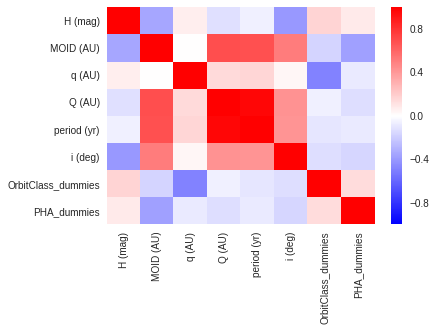

In [9]:
sb.heatmap(datacorr, cmap = 'bwr') #heatmap of correlation matrix
###darker colors represent higher correlation, several pairs of variables are highly correlated.

In [10]:

msk=np.random.rand(len(data))<0.7
training=data[msk]
test=data[~msk]
len(test)
len(training)


124

In [11]:
training.head()

,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class,OrbitClass_dummies,PHA_dummies
1,419624 (2010 SO16),09/17/2010,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo,1,1
3,414746 (2010 EH20),03/06/2010,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor,0,0
4,407324 (2010 OB101),07/18/2010,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo,1,0
5,398188 (2010 LE15),06/03/2010,19.5,0.024,0.63,1.10,0.80,13.25,Y,Aten,0,1
6,395207 (2010 HQ80),04/25/2010,19.6,0.007,0.80,2.34,1.96,27.85,Y,Apollo,1,1


In [12]:
y=training["PHA_dummies"]
x=training.iloc[:,[2,3,4,5,6,7,10]]
#x=train[:,"Designation":"PHA"]
#x=train["Designation","Discovery Date YYYY-MM-DD","H (mag)"]
x.head()



,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),OrbitClass_dummies
1,20.5,0.028,0.93,1.08,1.00,14.52,1
3,18.0,0.268,1.25,3.99,4.24,23.89,0
4,20.7,0.111,0.77,2.46,2.06,9.12,1
5,19.5,0.024,0.63,1.10,0.80,13.25,0
6,19.6,0.007,0.80,2.34,1.96,27.85,1


In [13]:
pca = skdc.PCA() #empty model space

In [14]:
pcafit = pca.fit_transform(x,y) ##apply dimensionality reduction to X

In [15]:
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
print(pd.Series(var_explained))
### some variables are not needed
###since they explain less than.01 of the variance
print(sum(var_explained[0:10]))
##indeed,the first 2 PCs explain 99% of the variance

0    0.951914
1    0.033116
2    0.012546
3    0.001918
4    0.000346
5    0.000097
6    0.000062
dtype: float64
1.0


In [16]:
pca = skdc.PCA(0,1) #only include first 2 components
logreg = sklm.LogisticRegression(x,y)#empty model space
pipeline = skpl.Pipeline([('pca', pca), ('logistic', logreg)]) #create pipeline from pca to logregression space

In [17]:
model = LogisticRegression()
model.fit(x,y)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
model.coef_

array([[ 0.00283978, -1.91162187, -0.21725249, -0.37713679, -0.06122742,
        -0.01857572,  0.60641616]])

In [19]:
model.intercept_

array([ 0.21884011])

In [20]:
newX=test.iloc[:,[2,3,4,5,6,7,10]]

In [21]:
model.predict(newX)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [22]:
print(model.classes_)
print(model.predict_proba(newX))
k=model.predict_proba(newX)

[0 1]
[[  8.02602577e-01   1.97397423e-01]
 [  7.51355128e-01   2.48644872e-01]
 [  7.42962557e-01   2.57037443e-01]
 [  9.13566955e-01   8.64330450e-02]
 [  7.45835724e-01   2.54164276e-01]
 [  9.20464068e-01   7.95359321e-02]
 [  8.78332597e-01   1.21667403e-01]
 [  8.13036465e-01   1.86963535e-01]
 [  9.20636115e-01   7.93638849e-02]
 [  8.53420693e-01   1.46579307e-01]
 [  9.40665535e-01   5.93344650e-02]
 [  8.23415391e-01   1.76584609e-01]
 [  7.32691205e-01   2.67308795e-01]
 [  9.60047260e-01   3.99527402e-02]
 [  1.00000000e+00   2.55042000e-12]
 [  8.41927332e-01   1.58072668e-01]
 [  6.77794152e-01   3.22205848e-01]
 [  9.55028835e-01   4.49711647e-02]
 [  8.21541782e-01   1.78458218e-01]
 [  7.69760149e-01   2.30239851e-01]
 [  5.60144287e-01   4.39855713e-01]
 [  7.66137397e-01   2.33862603e-01]
 [  8.90977088e-01   1.09022912e-01]
 [  9.55081447e-01   4.49185527e-02]
 [  9.61429353e-01   3.85706467e-02]
 [  9.12421161e-01   8.75788395e-02]
 [  6.94264753e-01   3.05735247e

In [33]:
probalist = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
for i in probalist:
    k=model.predict_proba(newX)
    k=pd.DataFrame(k)
    indx = [] 
    for j in k.iloc[:,1]:
        if j > i:
            indx.append(1)
        else:
            indx.append(0)
    indx = pd.Series(indx)
    pred_class=model.classes_[indx]
    newy=test["PHA_dummies"]
    con=confusion_matrix(newy,pred_class)
    print(i)
    print(con)
#By observation its clear that the default .5 probability threshold is too high.
#Ideal range is .2 to .3, since lower and higher results in very small sensitivity

0.05
[[ 7 44]
 [ 0  6]]
0.1
[[19 32]
 [ 0  6]]
0.15
[[26 25]
 [ 0  6]]
0.2
[[31 20]
 [ 2  4]]
0.25
[[35 16]
 [ 2  4]]
0.3
[[44  7]
 [ 3  3]]
0.35
[[46  5]
 [ 4  2]]
0.4
[[49  2]
 [ 4  2]]
0.45
[[51  0]
 [ 6  0]]
0.5
[[51  0]
 [ 6  0]]


In [42]:
#balanced accuracy for .2, .25, and .3
print('Probability threshold: ',.2)
sens= 4/6
spec = 31/51
bal = (sens+spec)/2
print("Balanced Accuracy: ", bal)

Probability threshold:  0.2
Balanced Accuracy:  0.6372549019607843


In [43]:
print('Probability threshold',.25)
sens= 4/6
spec = 35/51
bal = (sens+spec)/2
print("Balanced Accuracy: ",bal)

Probability threshold 0.25
Balanced Accuracy:  0.6764705882352942


In [44]:
print('Probability threshold',.25)
sens= 3/6
spec = 44/51
bal = (sens+spec)/2
print("Balanced Accuracy: ",bal)

Probability threshold 0.25
Balanced Accuracy:  0.6813725490196079


In [45]:
#Now repeat earlier loop, but smaller increments from .25 to .3
probalist = [.25,.26,.27,.28,.29,.3]
for i in probalist:
    k=model.predict_proba(newX)
    k=pd.DataFrame(k)
    indx = [] 
    for j in k.iloc[:,1]:
        if j > i:
            indx.append(1)
        else:
            indx.append(0)
    indx = pd.Series(indx)
    pred_class=model.classes_[indx]
    newy=test["PHA_dummies"]
    con=confusion_matrix(newy,pred_class)
    print(i)
    print(con)
#It is clear that .25-3 is the ideal probability threshold range, and in this
#case .28 has the highest balanced accuracy

0.25
[[35 16]
 [ 2  4]]
0.26
[[37 14]
 [ 2  4]]
0.27
[[40 11]
 [ 2  4]]
0.28
[[42  9]
 [ 2  4]]
0.29
[[43  8]
 [ 3  3]]
0.3
[[44  7]
 [ 3  3]]


In [46]:
print('Probability threshold',.25)
sens= 4/6
spec = 42/51
bal = (sens+spec)/2
print("Balanced Accuracy: ",bal)

Probability threshold 0.25
Balanced Accuracy:  0.7450980392156863
